In [1]:
import re
import qiskit
import json
import time
import sys
import os

import numpy as np
from typing import List
from qiskit import *
import time
# Dynamically add the project root to sys.path
project_root = os.path.abspath(os.path.join(os.path.dirname(os.getcwd())))  # Adjust path to root
sys.path.append(project_root)

from src.CE_module import construct_qcc_circuit, CE_recur_tree, CE_recur_tree_seq
from benchmarks.UCCSD_entanglers import generate_UCCSD_entanglers


In [2]:
test_paulis = generate_UCCSD_entanglers(4, 8)
test_params = [0.01 * i for i in range(len(test_paulis))]
original_uccsd_qc = construct_qcc_circuit(test_paulis, test_params)
# Measure gate count for sequential method
opt_uccsd_qc_seq, append_clifford_seq, sorted_entanglers_seq = CE_recur_tree(entanglers=test_paulis, params=test_params, barrier=False)
# Measure gate count for commute method
opt_uccsd_qc, append_clifford, sorted_entanglers = CE_recur_tree_seq(entanglers=test_paulis, params=test_params, barrier=False)
opt_uccsd_qiskit_qc = transpile(opt_uccsd_qc, optimization_level=3, basis_gates=["cx", "sx", "x", "rz"])

In [3]:
original_uccsd_qc.count_ops()

OrderedDict([('cx', 2624), ('h', 2432), ('sdg', 608), ('s', 608), ('rz', 320)])

In [4]:
opt_uccsd_qc_seq.count_ops()

OrderedDict([('cx', 507), ('h', 366), ('rz', 320), ('sdg', 129)])

In [5]:
opt_uccsd_qc.count_ops()

OrderedDict([('cx', 492), ('h', 365), ('rz', 320), ('sdg', 142)])

In [6]:
opt_uccsd_qiskit_qc.count_ops()

OrderedDict([('rz', 796), ('sx', 508), ('cx', 433), ('x', 13)])

In [7]:
with open("../benchmarks/max_cut_paulis" + '/' + "max_cut_benchmark_regular_n20_e8_l1.json", "r") as file:
    test_paulis = json.load(file)
test_params = [0.01 * i for i in range(len(test_paulis))]
original_max_cut_qc = construct_qcc_circuit(test_paulis, test_params)
# Measure gate count for sequential method
opt_max_cut_qc_seq, append_clifford_seq, sorted_entanglers_seq = CE_recur_tree_seq(entanglers=test_paulis, params=test_params, barrier=False)
# Measure gate count for commute method
opt_max_cut_qc, append_clifford, sorted_entanglers = CE_recur_tree(entanglers=test_paulis, params=test_params, barrier=False)
opt_max_cut_qiskit_qc = transpile(opt_max_cut_qc, optimization_level=3, basis_gates=["cx", "sx", "x", "rz"])

In [8]:
original_max_cut_qc.count_ops()

OrderedDict([('cx', 160), ('rz', 100), ('h', 40)])

In [9]:
opt_max_cut_qc_seq.count_ops()

OrderedDict([('cx', 143), ('rz', 100), ('h', 20)])

In [10]:
opt_max_cut_qc.count_ops()

OrderedDict([('cx', 128), ('rz', 100), ('h', 20)])

In [11]:
opt_max_cut_qiskit_qc.count_ops()

OrderedDict([('cx', 128), ('rz', 118), ('sx', 20)])

In [12]:
opt_uccsd_qc_seq.count_ops()

OrderedDict([('cx', 507), ('h', 366), ('rz', 320), ('sdg', 129)])

In [13]:
uccsd_data = [original_uccsd_qc.count_ops()['cx'], opt_uccsd_qc_seq.count_ops()['cx'] * 2, opt_uccsd_qc.count_ops()['cx'] * 2, opt_uccsd_qc.count_ops()['cx'], opt_uccsd_qiskit_qc.count_ops()['cx']]
max_cut_data = [original_max_cut_qc.count_ops()['cx'], opt_max_cut_qc_seq.count_ops()['cx'] * 2, opt_max_cut_qc.count_ops()['cx'] * 2, opt_max_cut_qc.count_ops()['cx'], opt_max_cut_qiskit_qc.count_ops()['cx']]

In [14]:
data_labels = ["Original", "Recur_tree", "Commute", "Clifford_absorption", 'Qiskit Opt']

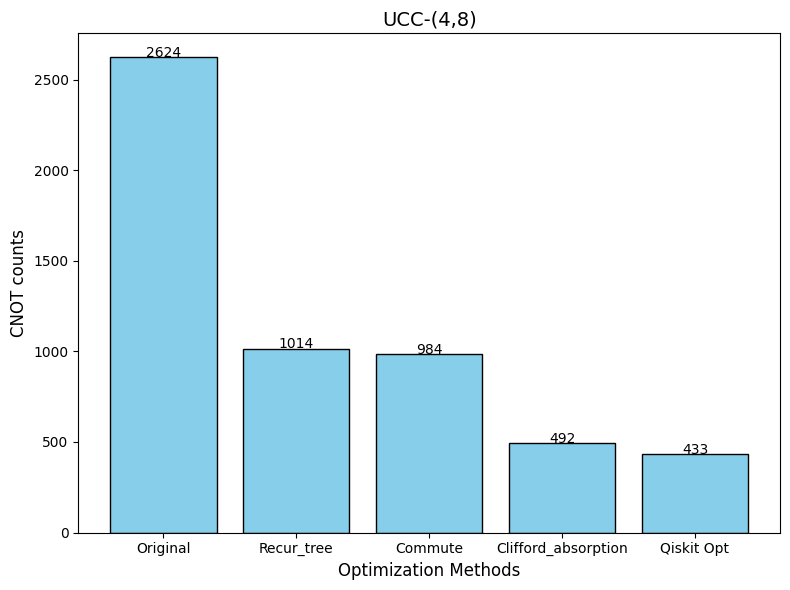

In [15]:
# Data
import matplotlib.pyplot as plt
data_labels = ["Original", "Recur_tree", "Commute", "Clifford_absorption", "Qiskit Opt"]
data_values = uccsd_data

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(data_labels, data_values, color="skyblue", edgecolor="black")

# Add labels and title
plt.xlabel("Optimization Methods", fontsize=12)
plt.ylabel("CNOT counts", fontsize=12)
plt.title("UCC-(4,8)", fontsize=14)

# Add data labels on top of the bars
for i, value in enumerate(data_values):
    plt.text(i, value + 2, str(value), ha="center", fontsize=10)

# Customize layout
plt.tight_layout()
# Save the plot as a PDF
plt.savefig("figures/figure10_uccsd.pdf", format="pdf", dpi=300)

# Display the plot
plt.show()


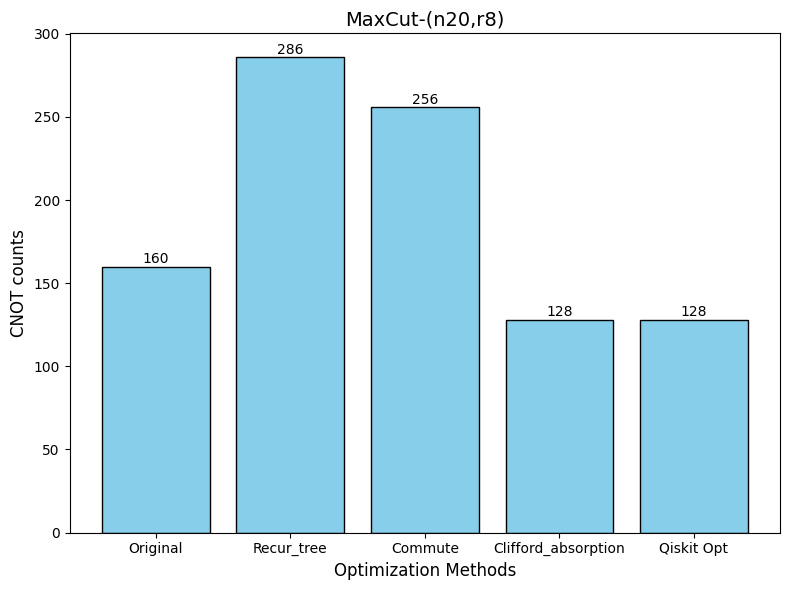

In [16]:
# Data
import matplotlib.pyplot as plt
data_labels = ["Original", "Recur_tree", "Commute", "Clifford_absorption", "Qiskit Opt"]
data_values = max_cut_data

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(data_labels, data_values, color="skyblue", edgecolor="black")

# Add labels and title
plt.xlabel("Optimization Methods", fontsize=12)
plt.ylabel("CNOT counts", fontsize=12)
plt.title("MaxCut-(n20,r8)", fontsize=14)

# Add data labels on top of the bars
for i, value in enumerate(data_values):
    plt.text(i, value + 2, str(value), ha="center", fontsize=10)

# Customize layout
plt.tight_layout()
plt.savefig("figures/figure10_maxcut.pdf", format="pdf", dpi=300)

# Display the plot
plt.show()
